Phase 4 Project Notebook by Ryan S. Chung

# Introduction

In [1]:
import pandas as pd
import numpy as np
import os , shutil
import glob

In [2]:
import cv2
import matplotlib.image as mpimg

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from sklearn.model_selection import train_test_split

In [4]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.image as mpimg

In [5]:
import time
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [6]:
from matplotlib import image
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Initial MLP Creation

In [7]:
NORMAL = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\*.jpeg")
PNEUMONIA = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\PNEUMONIA\\*jpeg")

In [8]:
data = []
labels = []

In [9]:
for i in NORMAL:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(0)
    
for i in PNEUMONIA:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(1)

In [10]:
data = np.array(data)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

Label: 0


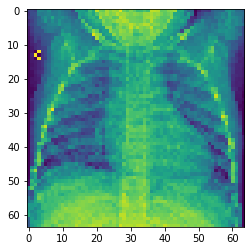

In [11]:
sample_image = X_train[0]
sample_label = y_train[0]
display(plt.imshow(sample_image))
print('Label: {}'.format(sample_label))

In [12]:
sample_image

array([[ 47,  58,  53, ...,  93,  92,  84],
       [ 37,  60,  63, ..., 102,  99,  94],
       [ 43,  54,  63, ..., 119, 108,  86],
       ...,
       [ 90, 144, 124, ..., 154, 111,   0],
       [ 73, 147, 154, ..., 160, 107,   0],
       [ 72, 136, 152, ..., 175,  81,   0]], dtype=uint8)

In [13]:
print(X_train.shape)
X_test.shape

(4172, 64, 64)


(1044, 64, 64)

In [14]:
X_train = X_train.reshape(4172, 4096).astype('float')
X_test = X_test.reshape(1044, 4096).astype('float')

In [15]:
print(X_train.shape)
X_test.shape

(4172, 4096)


(1044, 4096)

In [16]:
X_train /= 255.
X_test /= 255.

In [17]:
y_train[:2]

array([0, 1])

In [18]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)

In [19]:
y_train[0]

array([1., 0.], dtype=float32)

In [20]:
Model_1 = Sequential()
Model_1.add(Dense(64, activation = 'tanh', input_shape = (4096,)))
Model_1.add(Dense(2, activation = 'softmax'))

In [21]:
Model_1.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['acc'])

In [22]:
Model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                262208    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 130       
Total params: 262,338
Trainable params: 262,338
Non-trainable params: 0
_________________________________________________________________


In [23]:
results_1 = Model_1.fit(X_train, y_train, epochs = 12, batch_size = 64, validation_data = (X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 4ms/step - loss: 0.5375 - acc: 0.7706 - val_loss: 0.3722 - val_acc: 0.8027
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3606 - acc: 0.8492 - val_loss: 0.2676 - val_acc: 0.9128
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3096 - acc: 0.8785 - val_loss: 0.3315 - val_acc: 0.8285
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2534 - acc: 0.9017 - val_loss: 0.2853 - val_acc: 0.8678
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2547 - acc: 0.8936 - val_loss: 0.1861 - val_acc: 0.9282
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2140 - acc: 0.9118 - val_loss: 0.2155 - val_acc: 0.9071
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1848 - acc: 0.9305 - val_loss: 0.1643 - val_acc: 0.9310
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1845 - acc: 0.92

In [24]:
def visualize_training_results(results):
    
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

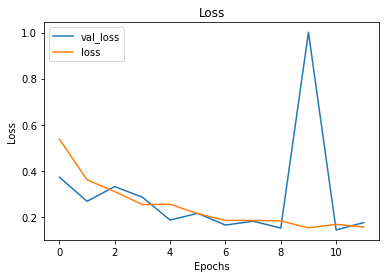

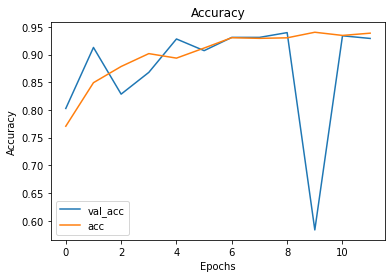

In [25]:
visualize_training_results(results_1)

In [26]:
Model_2 = Sequential()
Model_2.add(Dense(64, activation='tanh', input_shape=(4096,)))
Model_2.add(Dense(32, activation='tanh'))
Model_2.add(Dense(2, activation='softmax'))

In [27]:
Model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [28]:
Model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [29]:
results_2 = Model_2.fit(X_train, y_train, batch_size=64, epochs=12, validation_data=(X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 3ms/step - loss: 0.4970 - acc: 0.7792 - val_loss: 0.4156 - val_acc: 0.7615
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3854 - acc: 0.8377 - val_loss: 0.4401 - val_acc: 0.7644
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3146 - acc: 0.8660 - val_loss: 0.5353 - val_acc: 0.7261
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2779 - acc: 0.8893 - val_loss: 0.2362 - val_acc: 0.8994
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2344 - acc: 0.9070 - val_loss: 0.2030 - val_acc: 0.9205
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2256 - acc: 0.9082 - val_loss: 0.2086 - val_acc: 0.9243
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2143 - acc: 0.9128 - val_loss: 0.7922 - val_acc: 0.5987
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2151 - acc: 0.91

In [30]:
def visualize_training_results(results):
    history = results.history
    
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

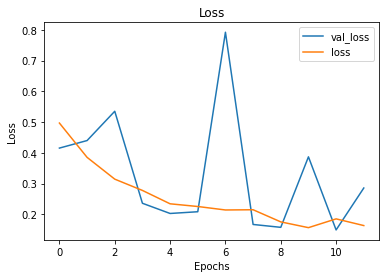

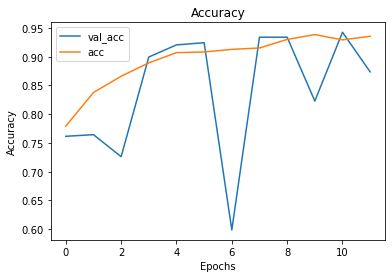

In [31]:
visualize_training_results(results_2)

In [32]:
Model_3 = Sequential()
Model_3.add(Dense(64, activation='relu', input_shape=(4096,)))
Model_3.add(Dense(32, activation='relu'))
Model_3.add(Dense(2, activation='softmax'))

In [33]:
Model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                262208    
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 66        
Total params: 264,354
Trainable params: 264,354
Non-trainable params: 0
_________________________________________________________________


In [34]:
Model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['acc'])

In [35]:
results_3 = Model_3.fit(X_train, y_train, epochs=12, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/12
66/66 [==============================] - 0s 3ms/step - loss: 0.5036 - acc: 0.7632 - val_loss: 0.5226 - val_acc: 0.7931
Epoch 2/12
66/66 [==============================] - 0s 2ms/step - loss: 0.4032 - acc: 0.8226 - val_loss: 0.3610 - val_acc: 0.8036
Epoch 3/12
66/66 [==============================] - 0s 2ms/step - loss: 0.3329 - acc: 0.8615 - val_loss: 0.3446 - val_acc: 0.8257
Epoch 4/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2787 - acc: 0.8830 - val_loss: 0.3046 - val_acc: 0.8563
Epoch 5/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2459 - acc: 0.8984 - val_loss: 0.1909 - val_acc: 0.9282
Epoch 6/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2424 - acc: 0.9080 - val_loss: 0.2082 - val_acc: 0.9138
Epoch 7/12
66/66 [==============================] - 0s 2ms/step - loss: 0.2390 - acc: 0.9034 - val_loss: 0.1758 - val_acc: 0.9301
Epoch 8/12
66/66 [==============================] - 0s 2ms/step - loss: 0.1899 - acc: 0.92

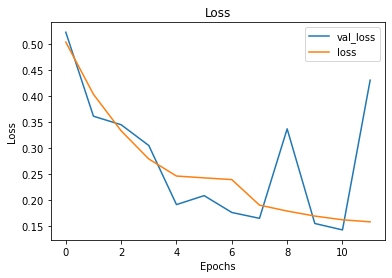

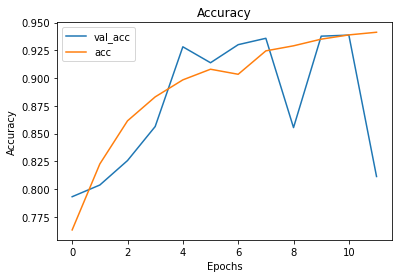

In [36]:
visualize_training_results(results_3)

# Creation of CNN

In [37]:
# Creating a CNN

In [38]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test",
    target_size=(64, 64), batch_size = 180)

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\val",
    target_size=(64, 64), batch_size = 200)

train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
    "C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train",
    target_size=(64, 64), batch_size = 200)

Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.


In [39]:
# Creating the data sets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [40]:
# Explore your dataset again

m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 200
Number of testing samples: 180
Number of validation samples: 16
train_images shape: (200, 64, 64, 3)
train_labels shape: (200, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (16, 64, 64, 3)
val_labels shape: (16, 2)


In [41]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(200, 12288)
(180, 12288)
(16, 12288)


In [42]:
train_y = np.reshape(train_labels[:,0], (200,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [43]:
from keras import models
from keras import layers
np.random.seed(123)

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) # 2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_A = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Epoch 1/50
7/7 [==============================] - 0s 15ms/step - loss: 0.6239 - accuracy: 0.7450 - val_loss: 0.7050 - val_accuracy: 0.5000
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.6019 - accuracy: 0.7450 - val_loss: 0.7635 - val_accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5560 - accuracy: 0.7450 - val_loss: 0.8494 - val_accuracy: 0.5000
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5546 - accuracy: 0.7450 - val_loss: 0.8423 - val_accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5499 - accuracy: 0.7450 - val_loss: 0.8089 - val_accuracy: 0.5000
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5396 - accuracy: 0.7450 - val_loss: 0.8083 - val_accuracy: 0.5000
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.7450 - val_loss: 0.7515 - val_accuracy: 0.5000
Epoch 8/50
7/7 [=================

In [45]:
# visualize_training_results(history_A)

In [46]:
results_train = model.evaluate(train_img, train_y)

7/7 [==============================] - 0s 786us/step - loss: 0.3491 - accuracy: 0.7850


In [47]:
results_test = model.evaluate(test_img, test_y)

6/6 [==============================] - 0s 750us/step - loss: 0.9136 - accuracy: 0.6500


In [48]:
results_train

[0.34914058446884155, 0.7850000262260437]

In [49]:
results_test

[0.9136024713516235, 0.6499999761581421]

In [50]:
# Building a CNN

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

history_B = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Epoch 1/30
7/7 [==============================] - 0s 45ms/step - loss: 0.6481 - acc: 0.7100 - val_loss: 0.7410 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5897 - acc: 0.7450 - val_loss: 0.7896 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5808 - acc: 0.7450 - val_loss: 0.8076 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5774 - acc: 0.7450 - val_loss: 0.8318 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5778 - acc: 0.7450 - val_loss: 0.7982 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5760 - acc: 0.7450 - val_loss: 0.8487 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5761 - acc: 0.7450 - val_loss: 0.8267 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5740 - acc: 0.7450 - val

In [52]:
# visualize_training_results(history_B)

In [53]:
results_train = model.evaluate(train_images, train_y)

7/7 [==============================] - 0s 6ms/step - loss: 0.5605 - acc: 0.7450


In [54]:
results_test = model.evaluate(test_images, test_y)

6/6 [==============================] - 0s 6ms/step - loss: 0.6294 - acc: 0.6500


In [55]:
results_train

[0.5604907870292664, 0.7450000047683716]

In [56]:
results_test

[0.629359245300293, 0.6499999761581421]

# Grid Search Tuning

In [66]:
pip install talos

  Created wheel for kerasplotlib: filename=kerasplotlib-0.1.6-py3-none-any.whl size=3608 sha256=87107651fa6ec2ded0bac866f7bf0830d19791545f6786abfeee423cabd824df
  Stored in directory: c:\users\rychu\appdata\local\pip\cache\wheels\49\f1\a2\c1a52cd15ac3769ed9f4e8c7a22b575f82197a49123b29630b
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=ed0e926b3ce24905609263f227094609b2d42b766610cef101904df9ad7b5e7c
  Stored in directory: c:\users\rychu\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41613 sha256=9bf65c6d24a77ac26ac4bc0c9b6891b351db8d182feb456e26da80ab3182d85c
  Stored in directory: c:\users\rychu\appdata\local\pip\cache\wheels\bc\47\dc\208d4038848287f804b6ededf43632ba7dbea530fdb3a069e4
Successfully built kerasplotlib sklearn chances
Note: you may need to restart the kernel to use updated packages.


In [77]:
import talos
import numpy

In [78]:
NORMAL_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\*.jpeg")
PNEUMONIA_2 = glob.glob("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\PNEUMONIA\\*jpeg")

In [79]:
data_2 = []
labels_2 = []

In [80]:
for i in NORMAL_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data_2.append(image)
    labels_2.append(0)
    
for i in PNEUMONIA_2:   
    image= tf.keras.preprocessing.image.load_img(i, color_mode='grayscale', target_size= (64,64))
    image=np.array(image)
    data_2.append(image)
    labels_2.append(1)

In [81]:
data_2 = np.array(data_2)
labels_2 = np.array(labels_2)

X_train, X_test, y_train, y_test = train_test_split(data_2, labels_2, test_size=0.2, random_state=42)

In [90]:
def dense_network(x_train, y_train, x_test, y_test, params):
    
    model = models.Sequential()
    
    # hidden layers
    model.add(layers.Conv2D(32, (3, 3), activation=params['activation1'], input_shape=(64 ,64,  3)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(32, (4, 4), activation=params['activation2']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation=params['activation3']))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Flatten())
    
    model.add(layers.Dense(64, activation=params['activation4']))
    model.add(layers.Dropout(params['dropout']))
    
    # output layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
              optimizer=params['optimizer'],
              metrics=['acc'])

    out = model.fit(train_images,
                        train_y,
                        epochs=30,
                        batch_size=32,
                        validation_data=(val_images, val_y))
    return out, model

In [91]:
params = {'dropout': [0.1, 0.3, 0.5],
         'optimizer': ['adam', 'sgd'],
         'activation1': ['relu', 'tanh'],
         'activation2': ['relu', 'tanh'],
         'activation3': ['relu', 'tanh'],
         'activation4': ['relu', 'tanh'],}

In [92]:
results = talos.Scan(X_train, y_train, params=params, model = dense_network, experiment_name='grid')


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.5931 - acc: 0.7450 - val_loss: 0.8812 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5895 - acc: 0.7450 - val_loss: 0.8548 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5822 - acc: 0.7450 - val_loss: 0.7988 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5541 - acc: 0.7450 - val_loss: 0.9393 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5821 - acc: 0.7500 - val_loss: 0.6678 - val_acc: 0.5625
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5488 - acc: 0.7450 - val_loss: 0.8191 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4723 - acc: 0.7950 - val_loss: 0.7281 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3972 - acc: 0.7950 - val


  1%|          | 1/96 [00:09<14:22,  9.08s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6255 - acc: 0.7500 - val_loss: 0.7950 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5814 - acc: 0.7450 - val_loss: 0.7862 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5712 - acc: 0.7450 - val_loss: 0.8502 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5697 - acc: 0.7450 - val_loss: 0.8622 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5738 - acc: 0.7450 - val_loss: 0.9320 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5762 - acc: 0.7450 - val_loss: 0.8382 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5700 - acc: 0.7450 - val_loss: 0.7861 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5681 - acc: 0.7450 - val


  2%|▏         | 2/96 [00:17<14:08,  9.03s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6234 - acc: 0.7050 - val_loss: 0.7237 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6146 - acc: 0.7450 - val_loss: 0.7304 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5856 - acc: 0.7450 - val_loss: 0.9083 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5720 - acc: 0.7450 - val_loss: 0.7397 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5843 - acc: 0.7450 - val_loss: 0.7554 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5490 - acc: 0.7450 - val_loss: 0.7854 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4831 - acc: 0.7500 - val_loss: 0.7300 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3876 - acc: 0.8350 - val


  3%|▎         | 3/96 [00:27<14:01,  9.05s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.7106 - acc: 0.3700 - val_loss: 0.6905 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6732 - acc: 0.7300 - val_loss: 0.6944 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6526 - acc: 0.7450 - val_loss: 0.7019 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6338 - acc: 0.7450 - val_loss: 0.7145 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6074 - acc: 0.7450 - val_loss: 0.7278 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5927 - acc: 0.7450 - val_loss: 0.7497 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5756 - acc: 0.7450 - val_loss: 0.7868 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5738 - acc: 0.7450 - val


  4%|▍         | 4/96 [00:35<13:46,  8.98s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6247 - acc: 0.7100 - val_loss: 0.7637 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5917 - acc: 0.7450 - val_loss: 0.8173 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5707 - acc: 0.7500 - val_loss: 0.8244 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5706 - acc: 0.7450 - val_loss: 0.7843 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5564 - acc: 0.7450 - val_loss: 0.8223 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5412 - acc: 0.7450 - val_loss: 0.8327 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5085 - acc: 0.7600 - val_loss: 0.8488 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4842 - acc: 0.7450 - val


  5%|▌         | 5/96 [00:44<13:38,  8.99s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6363 - acc: 0.7200 - val_loss: 0.7265 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5979 - acc: 0.7450 - val_loss: 0.7723 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5829 - acc: 0.7450 - val_loss: 0.7762 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5769 - acc: 0.7450 - val_loss: 0.8365 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5952 - acc: 0.7450 - val_loss: 0.8352 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5536 - acc: 0.7450 - val_loss: 0.8183 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5689 - acc: 0.7450 - val_loss: 0.8412 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5778 - acc: 0.7450 - val


  6%|▋         | 6/96 [00:53<13:27,  8.97s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6774 - acc: 0.6700 - val_loss: 0.6900 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6187 - acc: 0.7450 - val_loss: 0.8766 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5709 - acc: 0.7450 - val_loss: 0.7730 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5302 - acc: 0.7450 - val_loss: 1.0446 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4790 - acc: 0.8150 - val_loss: 0.8418 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4278 - acc: 0.7900 - val_loss: 1.0311 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3637 - acc: 0.8450 - val_loss: 0.7974 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3246 - acc: 0.8800 - val


  7%|▋         | 7/96 [01:02<13:17,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6332 - acc: 0.7250 - val_loss: 0.7169 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5940 - acc: 0.7450 - val_loss: 0.7841 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5795 - acc: 0.7450 - val_loss: 0.8222 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5710 - acc: 0.7450 - val_loss: 0.9094 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5844 - acc: 0.7450 - val_loss: 0.8402 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5701 - acc: 0.7450 - val_loss: 0.8329 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5657 - acc: 0.7450 - val_loss: 0.8111 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5696 - acc: 0.7450 - val


  8%|▊         | 8/96 [01:11<13:04,  8.91s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6171 - acc: 0.6650 - val_loss: 0.6962 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6107 - acc: 0.7450 - val_loss: 0.7720 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5901 - acc: 0.7450 - val_loss: 0.8313 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5530 - acc: 0.7450 - val_loss: 0.7626 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5428 - acc: 0.7450 - val_loss: 0.7707 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4882 - acc: 0.7700 - val_loss: 0.7836 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4043 - acc: 0.8350 - val_loss: 1.5584 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4828 - acc: 0.7950 - val


  9%|▉         | 9/96 [01:20<12:56,  8.93s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6669 - acc: 0.6250 - val_loss: 0.7029 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6060 - acc: 0.7450 - val_loss: 0.8051 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5714 - acc: 0.7450 - val_loss: 0.7712 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5753 - acc: 0.7450 - val_loss: 0.7675 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5804 - acc: 0.7450 - val_loss: 0.7638 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5733 - acc: 0.7450 - val_loss: 0.7575 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5842 - acc: 0.7450 - val_loss: 0.7969 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5616 - acc: 0.7450 - val


 10%|█         | 10/96 [01:29<12:48,  8.94s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6983 - acc: 0.7000 - val_loss: 0.6891 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6273 - acc: 0.7350 - val_loss: 0.8396 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5835 - acc: 0.7450 - val_loss: 0.8233 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5862 - acc: 0.7450 - val_loss: 0.8265 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5667 - acc: 0.7450 - val_loss: 0.8028 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5485 - acc: 0.7450 - val_loss: 0.8770 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5564 - acc: 0.7450 - val_loss: 0.7742 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5426 - acc: 0.7700 - val


 11%|█▏        | 11/96 [01:38<12:45,  9.01s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.7249 - acc: 0.4900 - val_loss: 0.7057 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6152 - acc: 0.7450 - val_loss: 0.7646 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5827 - acc: 0.7450 - val_loss: 0.7900 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5892 - acc: 0.7450 - val_loss: 0.8127 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5893 - acc: 0.7450 - val_loss: 0.8185 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5689 - acc: 0.7450 - val_loss: 0.8546 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5722 - acc: 0.7450 - val_loss: 0.8701 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5887 - acc: 0.7450 - val


 12%|█▎        | 12/96 [01:47<12:34,  8.99s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6093 - acc: 0.7450 - val_loss: 0.7827 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5711 - acc: 0.7450 - val_loss: 0.8214 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5453 - acc: 0.7450 - val_loss: 0.9434 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5185 - acc: 0.7450 - val_loss: 0.6666 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4715 - acc: 0.7450 - val_loss: 0.6989 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4121 - acc: 0.8200 - val_loss: 0.7378 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3236 - acc: 0.8700 - val_loss: 0.7787 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3118 - acc: 0.8550 - val


 14%|█▎        | 13/96 [01:56<12:25,  8.98s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6169 - acc: 0.7450 - val_loss: 0.7964 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5838 - acc: 0.7450 - val_loss: 0.8570 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5777 - acc: 0.7450 - val_loss: 0.8183 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5759 - acc: 0.7450 - val_loss: 0.8217 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5768 - acc: 0.7450 - val_loss: 0.8538 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5800 - acc: 0.7450 - val_loss: 0.8425 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5703 - acc: 0.7450 - val_loss: 0.7821 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5669 - acc: 0.7450 - val


 15%|█▍        | 14/96 [02:05<12:14,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6056 - acc: 0.7000 - val_loss: 0.7753 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5867 - acc: 0.7450 - val_loss: 0.7411 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5595 - acc: 0.7450 - val_loss: 0.8608 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5335 - acc: 0.7450 - val_loss: 0.7453 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4786 - acc: 0.7450 - val_loss: 0.7717 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4436 - acc: 0.7450 - val_loss: 1.0261 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4238 - acc: 0.7900 - val_loss: 0.7344 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4083 - acc: 0.8150 - val


 16%|█▌        | 15/96 [02:14<12:03,  8.93s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6448 - acc: 0.7450 - val_loss: 0.7307 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5948 - acc: 0.7450 - val_loss: 0.7660 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5905 - acc: 0.7450 - val_loss: 0.8025 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5852 - acc: 0.7450 - val_loss: 0.8301 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5836 - acc: 0.7450 - val_loss: 0.8473 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5679 - acc: 0.7450 - val_loss: 0.8328 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5742 - acc: 0.7450 - val_loss: 0.8495 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5779 - acc: 0.7450 - val


 17%|█▋        | 16/96 [02:23<11:56,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6352 - acc: 0.7200 - val_loss: 0.7076 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6107 - acc: 0.7250 - val_loss: 0.8001 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5671 - acc: 0.7450 - val_loss: 0.7754 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5566 - acc: 0.7450 - val_loss: 0.8391 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5310 - acc: 0.7450 - val_loss: 0.8437 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5410 - acc: 0.7450 - val_loss: 0.7161 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4771 - acc: 0.7450 - val_loss: 0.8666 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4464 - acc: 0.7650 - val


 18%|█▊        | 17/96 [02:32<11:53,  9.03s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6591 - acc: 0.6650 - val_loss: 0.7206 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6113 - acc: 0.7450 - val_loss: 0.7759 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5691 - acc: 0.7450 - val_loss: 0.7990 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5648 - acc: 0.7450 - val_loss: 0.8477 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5662 - acc: 0.7450 - val_loss: 0.7945 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5984 - acc: 0.7450 - val_loss: 0.7706 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5913 - acc: 0.7450 - val_loss: 0.7861 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5795 - acc: 0.7400 - val


 19%|█▉        | 18/96 [02:41<11:39,  8.96s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.5888 - acc: 0.7450 - val_loss: 0.8996 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5458 - acc: 0.7450 - val_loss: 1.0121 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5070 - acc: 0.7800 - val_loss: 1.6622 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.6694 - acc: 0.7550 - val_loss: 0.6039 - val_acc: 0.7500
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5446 - acc: 0.7700 - val_loss: 0.6596 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4507 - acc: 0.7900 - val_loss: 0.6557 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3726 - acc: 0.8350 - val_loss: 0.5371 - val_acc: 0.7500
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3116 - acc: 0.8900 - val


 20%|█▉        | 19/96 [02:50<11:27,  8.93s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6070 - acc: 0.7450 - val_loss: 0.7697 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5741 - acc: 0.7450 - val_loss: 0.8283 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5716 - acc: 0.7450 - val_loss: 0.8366 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5683 - acc: 0.7450 - val_loss: 0.8576 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5716 - acc: 0.7450 - val_loss: 0.8498 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5698 - acc: 0.7450 - val_loss: 0.8636 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5644 - acc: 0.7450 - val_loss: 0.7999 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5589 - acc: 0.7450 - val


 21%|██        | 20/96 [02:59<11:15,  8.89s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6211 - acc: 0.7400 - val_loss: 0.8997 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5693 - acc: 0.7450 - val_loss: 0.9502 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5410 - acc: 0.7550 - val_loss: 0.7710 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4370 - acc: 0.7950 - val_loss: 0.5414 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3938 - acc: 0.8150 - val_loss: 0.5247 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3406 - acc: 0.8300 - val_loss: 0.5925 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2764 - acc: 0.8750 - val_loss: 0.4581 - val_acc: 0.8125
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2417 - acc: 0.8850 - val


 22%|██▏       | 21/96 [03:07<11:06,  8.88s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6104 - acc: 0.7350 - val_loss: 0.7758 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5790 - acc: 0.7450 - val_loss: 0.8185 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5744 - acc: 0.7450 - val_loss: 0.7782 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5595 - acc: 0.7450 - val_loss: 0.8467 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5708 - acc: 0.7450 - val_loss: 0.8801 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5683 - acc: 0.7450 - val_loss: 0.7512 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5645 - acc: 0.7450 - val_loss: 0.8536 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5719 - acc: 0.7450 - val


 23%|██▎       | 22/96 [03:16<10:54,  8.85s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6286 - acc: 0.6950 - val_loss: 0.7678 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5437 - acc: 0.7450 - val_loss: 0.7743 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4885 - acc: 0.7700 - val_loss: 0.6237 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4483 - acc: 0.8400 - val_loss: 1.0231 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4035 - acc: 0.8150 - val_loss: 0.8012 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3441 - acc: 0.8500 - val_loss: 0.4738 - val_acc: 0.8125
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3483 - acc: 0.8500 - val_loss: 0.6162 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3048 - acc: 0.8800 - val


 24%|██▍       | 23/96 [03:25<10:46,  8.85s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6262 - acc: 0.7100 - val_loss: 0.7928 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6022 - acc: 0.7450 - val_loss: 0.8463 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5772 - acc: 0.7450 - val_loss: 0.8336 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5785 - acc: 0.7450 - val_loss: 0.8232 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5689 - acc: 0.7450 - val_loss: 0.7696 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5724 - acc: 0.7450 - val_loss: 0.8119 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5598 - acc: 0.7450 - val_loss: 0.7723 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5859 - acc: 0.7450 - val


 25%|██▌       | 24/96 [03:34<10:36,  8.83s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6304 - acc: 0.7250 - val_loss: 0.7086 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6206 - acc: 0.7450 - val_loss: 0.8684 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5846 - acc: 0.7450 - val_loss: 0.7453 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5513 - acc: 0.7450 - val_loss: 1.1027 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5974 - acc: 0.7450 - val_loss: 0.6855 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5533 - acc: 0.7450 - val_loss: 0.8676 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5222 - acc: 0.7450 - val_loss: 0.7069 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4718 - acc: 0.7450 - val


 26%|██▌       | 25/96 [03:43<10:28,  8.86s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6355 - acc: 0.7450 - val_loss: 0.7214 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5972 - acc: 0.7450 - val_loss: 0.7737 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5784 - acc: 0.7450 - val_loss: 0.7940 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5749 - acc: 0.7450 - val_loss: 0.8087 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5764 - acc: 0.7450 - val_loss: 0.8174 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5745 - acc: 0.7450 - val_loss: 0.8546 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5694 - acc: 0.7450 - val_loss: 0.8953 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5673 - acc: 0.7450 - val


 27%|██▋       | 26/96 [03:52<10:18,  8.84s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5967 - acc: 0.7300 - val_loss: 0.7195 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6342 - acc: 0.7150 - val_loss: 0.7128 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6140 - acc: 0.7400 - val_loss: 0.8305 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5845 - acc: 0.7450 - val_loss: 0.7691 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5629 - acc: 0.7450 - val_loss: 0.8850 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5344 - acc: 0.7450 - val_loss: 0.9828 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5126 - acc: 0.7550 - val_loss: 0.6553 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4786 - acc: 0.7500 - val


 28%|██▊       | 27/96 [04:00<10:11,  8.86s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6570 - acc: 0.6250 - val_loss: 0.7188 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5762 - acc: 0.7450 - val_loss: 0.7980 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5752 - acc: 0.7450 - val_loss: 0.8182 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5769 - acc: 0.7450 - val_loss: 0.8718 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5715 - acc: 0.7450 - val_loss: 0.8537 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5601 - acc: 0.7450 - val_loss: 0.8830 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5684 - acc: 0.7450 - val_loss: 0.8426 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5570 - acc: 0.7450 - val


 29%|██▉       | 28/96 [04:09<10:02,  8.85s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6306 - acc: 0.6900 - val_loss: 0.8317 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5801 - acc: 0.7450 - val_loss: 0.7242 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5738 - acc: 0.7350 - val_loss: 1.0005 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5970 - acc: 0.7450 - val_loss: 0.6984 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5481 - acc: 0.7450 - val_loss: 0.9485 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5410 - acc: 0.7500 - val_loss: 0.7147 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5176 - acc: 0.7400 - val_loss: 0.7877 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4750 - acc: 0.7600 - val


 30%|███       | 29/96 [04:18<09:54,  8.87s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6347 - acc: 0.7150 - val_loss: 0.7519 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5756 - acc: 0.7450 - val_loss: 0.8526 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5858 - acc: 0.7450 - val_loss: 0.8003 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5642 - acc: 0.7450 - val_loss: 0.7605 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5914 - acc: 0.7500 - val_loss: 0.7910 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5717 - acc: 0.7450 - val_loss: 0.7988 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5741 - acc: 0.7450 - val_loss: 0.7392 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5785 - acc: 0.7450 - val


 31%|███▏      | 30/96 [04:27<09:44,  8.85s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6187 - acc: 0.7450 - val_loss: 0.7260 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5979 - acc: 0.7450 - val_loss: 0.7778 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5811 - acc: 0.7450 - val_loss: 0.8241 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5037 - acc: 0.7450 - val_loss: 0.7287 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4963 - acc: 0.7000 - val_loss: 0.8691 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4236 - acc: 0.7800 - val_loss: 0.5442 - val_acc: 0.8125
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.3651 - acc: 0.8650 - val_loss: 0.9038 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3283 - acc: 0.8700 - val


 32%|███▏      | 31/96 [04:36<09:36,  8.87s/it]

Epoch 1/30
7/7 [==============================] - 0s 46ms/step - loss: 0.6449 - acc: 0.6500 - val_loss: 0.7541 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5826 - acc: 0.7450 - val_loss: 0.8040 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5785 - acc: 0.7450 - val_loss: 0.9067 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5758 - acc: 0.7450 - val_loss: 0.7745 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5759 - acc: 0.7450 - val_loss: 0.8472 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5681 - acc: 0.7450 - val_loss: 0.8322 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5730 - acc: 0.7450 - val_loss: 0.7680 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5675 - acc: 0.7450 - val


 33%|███▎      | 32/96 [04:45<09:26,  8.86s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6386 - acc: 0.7050 - val_loss: 0.7482 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.6065 - acc: 0.7450 - val_loss: 0.7531 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5890 - acc: 0.7450 - val_loss: 0.8225 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5348 - acc: 0.7450 - val_loss: 0.6731 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5170 - acc: 0.8100 - val_loss: 0.9645 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4474 - acc: 0.7850 - val_loss: 0.8062 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4301 - acc: 0.7800 - val_loss: 0.6211 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3396 - acc: 0.8350 - val


 34%|███▍      | 33/96 [04:54<09:18,  8.86s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6117 - acc: 0.7400 - val_loss: 0.7727 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5832 - acc: 0.7450 - val_loss: 0.8200 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5636 - acc: 0.7450 - val_loss: 0.8278 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5684 - acc: 0.7450 - val_loss: 0.8423 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5596 - acc: 0.7450 - val_loss: 0.8849 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5619 - acc: 0.7450 - val_loss: 0.7853 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5668 - acc: 0.7450 - val_loss: 0.9014 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5643 - acc: 0.7450 - val


 35%|███▌      | 34/96 [05:02<09:09,  8.86s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6362 - acc: 0.6900 - val_loss: 0.7430 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5639 - acc: 0.7450 - val_loss: 1.1217 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5780 - acc: 0.7450 - val_loss: 0.6698 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5962 - acc: 0.7500 - val_loss: 0.8032 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5335 - acc: 0.7650 - val_loss: 0.6897 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4681 - acc: 0.7750 - val_loss: 0.5583 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4143 - acc: 0.7650 - val_loss: 0.5599 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3644 - acc: 0.8300 - val


 36%|███▋      | 35/96 [05:12<09:08,  8.99s/it]

Epoch 1/30
7/7 [==============================] - 0s 52ms/step - loss: 0.6432 - acc: 0.7350 - val_loss: 0.7217 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5869 - acc: 0.7450 - val_loss: 0.7909 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5942 - acc: 0.7450 - val_loss: 0.8709 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5755 - acc: 0.7450 - val_loss: 0.8736 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5756 - acc: 0.7450 - val_loss: 0.7715 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5706 - acc: 0.7450 - val_loss: 0.8726 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5676 - acc: 0.7450 - val_loss: 0.8052 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5662 - acc: 0.7450 - val


 38%|███▊      | 36/96 [05:21<08:59,  8.99s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6049 - acc: 0.7450 - val_loss: 1.0275 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5777 - acc: 0.7450 - val_loss: 0.7990 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5056 - acc: 0.7450 - val_loss: 0.7032 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4382 - acc: 0.7650 - val_loss: 0.8520 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3569 - acc: 0.8500 - val_loss: 0.8840 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2944 - acc: 0.8600 - val_loss: 1.5992 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2814 - acc: 0.8700 - val_loss: 1.4431 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2531 - acc: 0.8900 - val


 39%|███▊      | 37/96 [05:30<08:52,  9.02s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6133 - acc: 0.7350 - val_loss: 0.7665 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5676 - acc: 0.7450 - val_loss: 0.8107 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5551 - acc: 0.7450 - val_loss: 0.8182 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5574 - acc: 0.7450 - val_loss: 0.7297 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5609 - acc: 0.7450 - val_loss: 0.7470 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5537 - acc: 0.7450 - val_loss: 0.7486 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5493 - acc: 0.7450 - val_loss: 0.7617 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5466 - acc: 0.7450 - val


 40%|███▉      | 38/96 [05:39<08:43,  9.02s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5866 - acc: 0.7400 - val_loss: 0.8140 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5489 - acc: 0.7550 - val_loss: 0.7659 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5041 - acc: 0.7550 - val_loss: 0.6728 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.4885 - acc: 0.7600 - val_loss: 0.6725 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4638 - acc: 0.7700 - val_loss: 0.6163 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4353 - acc: 0.8650 - val_loss: 1.1152 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3516 - acc: 0.8650 - val_loss: 0.8515 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2824 - acc: 0.8950 - val


 41%|████      | 39/96 [05:48<08:36,  9.06s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5985 - acc: 0.7450 - val_loss: 0.8074 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5801 - acc: 0.7450 - val_loss: 0.7713 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5712 - acc: 0.7450 - val_loss: 0.7863 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5672 - acc: 0.7450 - val_loss: 0.8104 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5609 - acc: 0.7450 - val_loss: 0.8003 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5635 - acc: 0.7450 - val_loss: 0.7784 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5491 - acc: 0.7450 - val_loss: 0.7593 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5632 - acc: 0.7450 - val


 42%|████▏     | 40/96 [05:57<08:23,  9.00s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6528 - acc: 0.6200 - val_loss: 0.6865 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5890 - acc: 0.7050 - val_loss: 1.0180 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5851 - acc: 0.7450 - val_loss: 0.7253 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5385 - acc: 0.7400 - val_loss: 0.7944 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5038 - acc: 0.7600 - val_loss: 0.7452 - val_acc: 0.5625
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4796 - acc: 0.7700 - val_loss: 0.6156 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4914 - acc: 0.7850 - val_loss: 0.5837 - val_acc: 0.7500
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5161 - acc: 0.7400 - val


 43%|████▎     | 41/96 [06:06<08:20,  9.09s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6499 - acc: 0.6600 - val_loss: 0.7208 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5858 - acc: 0.7450 - val_loss: 0.7783 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5773 - acc: 0.7450 - val_loss: 0.8110 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5892 - acc: 0.7450 - val_loss: 0.7974 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5821 - acc: 0.7450 - val_loss: 0.8204 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5894 - acc: 0.7450 - val_loss: 0.7729 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5864 - acc: 0.7450 - val_loss: 0.8228 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5598 - acc: 0.7450 - val


 44%|████▍     | 42/96 [06:16<08:20,  9.26s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6709 - acc: 0.6100 - val_loss: 1.0887 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5136 - acc: 0.7550 - val_loss: 1.3695 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5745 - acc: 0.7700 - val_loss: 0.6938 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4738 - acc: 0.7550 - val_loss: 0.6012 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3799 - acc: 0.8750 - val_loss: 0.8223 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3062 - acc: 0.8850 - val_loss: 0.7801 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2383 - acc: 0.9050 - val_loss: 0.5930 - val_acc: 0.7500
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.2319 - acc: 0.8950 - val


 45%|████▍     | 43/96 [06:25<08:12,  9.29s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6292 - acc: 0.6600 - val_loss: 0.8018 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5773 - acc: 0.7450 - val_loss: 0.9166 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5807 - acc: 0.7450 - val_loss: 0.9014 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 32ms/step - loss: 0.5841 - acc: 0.7450 - val_loss: 0.8574 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5716 - acc: 0.7450 - val_loss: 0.8340 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5651 - acc: 0.7450 - val_loss: 0.8818 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5584 - acc: 0.7450 - val_loss: 0.8862 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5588 - acc: 0.7450 - val


 46%|████▌     | 44/96 [06:35<08:11,  9.45s/it]

Epoch 1/30
7/7 [==============================] - 0s 55ms/step - loss: 0.6485 - acc: 0.6750 - val_loss: 1.0248 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5834 - acc: 0.7450 - val_loss: 0.7047 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4950 - acc: 0.7500 - val_loss: 0.6425 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4478 - acc: 0.8150 - val_loss: 0.6740 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 39ms/step - loss: 0.4160 - acc: 0.8150 - val_loss: 1.1712 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 42ms/step - loss: 0.3348 - acc: 0.8450 - val_loss: 0.8056 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 41ms/step - loss: 0.2844 - acc: 0.8650 - val_loss: 0.5310 - val_acc: 0.8125
Epoch 8/30
7/7 [==============================] - 0s 41ms/step - loss: 0.2489 - acc: 0.9000 - val


 47%|████▋     | 45/96 [06:45<08:08,  9.58s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6242 - acc: 0.6900 - val_loss: 0.7635 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5719 - acc: 0.7450 - val_loss: 0.8268 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5497 - acc: 0.7450 - val_loss: 0.7627 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5743 - acc: 0.7450 - val_loss: 0.8132 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5629 - acc: 0.7450 - val_loss: 0.7246 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5671 - acc: 0.7450 - val_loss: 0.7658 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5512 - acc: 0.7450 - val_loss: 0.7785 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5501 - acc: 0.7450 - val


 48%|████▊     | 46/96 [06:54<07:55,  9.51s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.7893 - acc: 0.6250 - val_loss: 1.0563 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5769 - acc: 0.7450 - val_loss: 0.7757 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4951 - acc: 0.7550 - val_loss: 0.8715 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4532 - acc: 0.7950 - val_loss: 1.0872 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4286 - acc: 0.7850 - val_loss: 0.7193 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3813 - acc: 0.8200 - val_loss: 0.6410 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3192 - acc: 0.8700 - val_loss: 0.6061 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.2826 - acc: 0.8800 - val


 49%|████▉     | 47/96 [07:03<07:41,  9.42s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6186 - acc: 0.6750 - val_loss: 0.8746 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5885 - acc: 0.7350 - val_loss: 0.8666 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5898 - acc: 0.7450 - val_loss: 0.8479 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5902 - acc: 0.7450 - val_loss: 0.7397 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5829 - acc: 0.7450 - val_loss: 0.8001 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5554 - acc: 0.7450 - val_loss: 0.8539 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5631 - acc: 0.7450 - val_loss: 0.7763 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5480 - acc: 0.7450 - val


 50%|█████     | 48/96 [07:13<07:27,  9.32s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6094 - acc: 0.6850 - val_loss: 0.7566 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5950 - acc: 0.7450 - val_loss: 0.9150 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5837 - acc: 0.7450 - val_loss: 0.7287 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6068 - acc: 0.7450 - val_loss: 0.7256 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5594 - acc: 0.7450 - val_loss: 0.9733 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5579 - acc: 0.7450 - val_loss: 0.7862 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5326 - acc: 0.7450 - val_loss: 0.8250 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4899 - acc: 0.7450 - val


 51%|█████     | 49/96 [07:22<07:19,  9.34s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6331 - acc: 0.7100 - val_loss: 0.7742 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5712 - acc: 0.7450 - val_loss: 0.8054 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5694 - acc: 0.7450 - val_loss: 0.7812 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5720 - acc: 0.7450 - val_loss: 0.8802 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5647 - acc: 0.7450 - val_loss: 0.8658 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5600 - acc: 0.7450 - val_loss: 0.8294 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5643 - acc: 0.7450 - val_loss: 0.7906 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5570 - acc: 0.7450 - val


 52%|█████▏    | 50/96 [07:31<07:12,  9.41s/it]

Epoch 1/30
7/7 [==============================] - 0s 47ms/step - loss: 0.6279 - acc: 0.6550 - val_loss: 0.7325 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6372 - acc: 0.7450 - val_loss: 0.7797 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5850 - acc: 0.7450 - val_loss: 0.8534 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5548 - acc: 0.7450 - val_loss: 0.8151 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5577 - acc: 0.7450 - val_loss: 0.8017 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5351 - acc: 0.7450 - val_loss: 0.7126 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5251 - acc: 0.7450 - val_loss: 0.8410 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4835 - acc: 0.7450 - val


 53%|█████▎    | 51/96 [07:41<07:00,  9.34s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6299 - acc: 0.7100 - val_loss: 0.7488 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5917 - acc: 0.7450 - val_loss: 0.7540 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5809 - acc: 0.7450 - val_loss: 0.8405 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5717 - acc: 0.7450 - val_loss: 0.9033 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5804 - acc: 0.7450 - val_loss: 0.8127 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5739 - acc: 0.7450 - val_loss: 0.8439 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5601 - acc: 0.7450 - val_loss: 0.9033 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5688 - acc: 0.7450 - val


 54%|█████▍    | 52/96 [07:50<06:47,  9.26s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5990 - acc: 0.7150 - val_loss: 0.9088 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5622 - acc: 0.7400 - val_loss: 0.7984 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.6019 - acc: 0.7350 - val_loss: 0.8278 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5863 - acc: 0.7450 - val_loss: 0.7995 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5479 - acc: 0.7450 - val_loss: 0.8163 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5621 - acc: 0.7450 - val_loss: 0.6760 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5863 - acc: 0.7450 - val_loss: 0.8396 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5529 - acc: 0.7450 - val


 55%|█████▌    | 53/96 [07:59<06:40,  9.32s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6412 - acc: 0.7400 - val_loss: 0.7354 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5967 - acc: 0.7450 - val_loss: 0.7845 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5863 - acc: 0.7450 - val_loss: 0.7852 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5880 - acc: 0.7450 - val_loss: 0.7992 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5788 - acc: 0.7450 - val_loss: 0.7891 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5661 - acc: 0.7450 - val_loss: 0.8411 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5573 - acc: 0.7450 - val_loss: 0.8612 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5739 - acc: 0.7450 - val


 56%|█████▋    | 54/96 [08:08<06:29,  9.28s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6250 - acc: 0.7400 - val_loss: 0.8838 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5619 - acc: 0.7450 - val_loss: 0.8649 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5120 - acc: 0.7450 - val_loss: 0.6749 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4571 - acc: 0.8100 - val_loss: 0.5806 - val_acc: 0.5625
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5291 - acc: 0.7150 - val_loss: 0.5665 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4374 - acc: 0.8250 - val_loss: 1.1437 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3963 - acc: 0.8350 - val_loss: 0.5418 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3155 - acc: 0.8700 - val


 57%|█████▋    | 55/96 [08:18<06:19,  9.26s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6199 - acc: 0.7400 - val_loss: 0.7828 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5738 - acc: 0.7450 - val_loss: 0.8585 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5736 - acc: 0.7450 - val_loss: 0.8905 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5741 - acc: 0.7450 - val_loss: 0.8260 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5711 - acc: 0.7450 - val_loss: 0.8136 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5617 - acc: 0.7450 - val_loss: 0.9236 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5702 - acc: 0.7450 - val_loss: 0.7863 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5578 - acc: 0.7450 - val


 58%|█████▊    | 56/96 [08:27<06:08,  9.21s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6169 - acc: 0.7000 - val_loss: 0.9561 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6278 - acc: 0.7500 - val_loss: 0.8132 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5845 - acc: 0.7450 - val_loss: 0.7367 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5606 - acc: 0.7450 - val_loss: 0.7326 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5296 - acc: 0.7450 - val_loss: 0.7046 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4886 - acc: 0.7750 - val_loss: 0.6957 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4178 - acc: 0.8050 - val_loss: 0.5888 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3999 - acc: 0.8000 - val


 59%|█████▉    | 57/96 [08:36<05:58,  9.20s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6212 - acc: 0.7350 - val_loss: 0.8851 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5736 - acc: 0.7450 - val_loss: 0.7831 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5918 - acc: 0.7450 - val_loss: 0.7708 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5806 - acc: 0.7450 - val_loss: 0.9160 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5824 - acc: 0.7450 - val_loss: 0.8011 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5712 - acc: 0.7450 - val_loss: 0.7399 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5653 - acc: 0.7450 - val_loss: 0.8529 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5703 - acc: 0.7450 - val


 60%|██████    | 58/96 [08:45<05:48,  9.18s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.7248 - acc: 0.5700 - val_loss: 0.7050 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5831 - acc: 0.7450 - val_loss: 0.8781 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5866 - acc: 0.7450 - val_loss: 0.8659 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5488 - acc: 0.7450 - val_loss: 0.7662 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5660 - acc: 0.7450 - val_loss: 0.8891 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5691 - acc: 0.7450 - val_loss: 0.7374 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5170 - acc: 0.7550 - val_loss: 0.8807 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4862 - acc: 0.7650 - val


 61%|██████▏   | 59/96 [08:54<05:39,  9.18s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6542 - acc: 0.6200 - val_loss: 0.7745 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5665 - acc: 0.7450 - val_loss: 0.9070 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5709 - acc: 0.7450 - val_loss: 0.9384 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5717 - acc: 0.7450 - val_loss: 0.7826 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5657 - acc: 0.7450 - val_loss: 0.9120 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5680 - acc: 0.7450 - val_loss: 0.7716 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5694 - acc: 0.7450 - val_loss: 0.8594 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5782 - acc: 0.7450 - val


 62%|██████▎   | 60/96 [09:03<05:30,  9.17s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6415 - acc: 0.7450 - val_loss: 0.8834 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5671 - acc: 0.7450 - val_loss: 0.7288 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5168 - acc: 0.7450 - val_loss: 0.9402 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4597 - acc: 0.7450 - val_loss: 0.6273 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4161 - acc: 0.8250 - val_loss: 0.7128 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3527 - acc: 0.8150 - val_loss: 1.1843 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3534 - acc: 0.8500 - val_loss: 1.5321 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2969 - acc: 0.8600 - val


 64%|██████▎   | 61/96 [09:13<05:23,  9.24s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6835 - acc: 0.5500 - val_loss: 0.7220 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5906 - acc: 0.7450 - val_loss: 0.7836 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5701 - acc: 0.7450 - val_loss: 0.8020 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5659 - acc: 0.7450 - val_loss: 0.8063 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5682 - acc: 0.7450 - val_loss: 0.8164 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5678 - acc: 0.7450 - val_loss: 0.8496 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5667 - acc: 0.7450 - val_loss: 0.8586 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5578 - acc: 0.7450 - val


 65%|██████▍   | 62/96 [09:22<05:16,  9.30s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5983 - acc: 0.7300 - val_loss: 0.8187 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5632 - acc: 0.7450 - val_loss: 0.6799 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5513 - acc: 0.7500 - val_loss: 1.0855 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5106 - acc: 0.7500 - val_loss: 0.8662 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5003 - acc: 0.7550 - val_loss: 0.6261 - val_acc: 0.6875
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4701 - acc: 0.7800 - val_loss: 0.7987 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4031 - acc: 0.8600 - val_loss: 0.9522 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3599 - acc: 0.8050 - val


 66%|██████▌   | 63/96 [09:32<05:09,  9.38s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.7149 - acc: 0.4800 - val_loss: 0.7102 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6102 - acc: 0.7350 - val_loss: 0.7476 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5974 - acc: 0.7450 - val_loss: 0.7648 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5646 - acc: 0.7450 - val_loss: 0.8267 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5773 - acc: 0.7450 - val_loss: 0.8395 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5772 - acc: 0.7450 - val_loss: 0.7842 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5727 - acc: 0.7450 - val_loss: 0.8023 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5728 - acc: 0.7450 - val


 67%|██████▋   | 64/96 [09:41<05:01,  9.41s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6792 - acc: 0.7150 - val_loss: 0.7134 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5904 - acc: 0.7450 - val_loss: 0.8323 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5451 - acc: 0.7550 - val_loss: 0.7803 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5843 - acc: 0.7450 - val_loss: 0.7766 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5680 - acc: 0.7650 - val_loss: 0.7333 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5102 - acc: 0.7450 - val_loss: 0.7086 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4570 - acc: 0.7750 - val_loss: 0.8752 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3710 - acc: 0.8100 - val


 68%|██████▊   | 65/96 [09:51<04:53,  9.46s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6254 - acc: 0.6650 - val_loss: 0.7330 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5795 - acc: 0.7450 - val_loss: 0.7107 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5918 - acc: 0.7450 - val_loss: 0.7867 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5801 - acc: 0.7500 - val_loss: 0.8105 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5688 - acc: 0.7450 - val_loss: 0.7815 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5678 - acc: 0.7450 - val_loss: 0.7955 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5671 - acc: 0.7450 - val_loss: 0.8163 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5714 - acc: 0.7450 - val


 69%|██████▉   | 66/96 [10:00<04:45,  9.50s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.6331 - acc: 0.6550 - val_loss: 1.1631 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5714 - acc: 0.7300 - val_loss: 1.1013 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5363 - acc: 0.7500 - val_loss: 0.6049 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 41ms/step - loss: 0.4585 - acc: 0.7800 - val_loss: 0.8227 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 0.3884 - acc: 0.8300 - val_loss: 0.8004 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3146 - acc: 0.8600 - val_loss: 0.8104 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.2788 - acc: 0.8800 - val_loss: 0.8043 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 38ms/step - loss: 0.2161 - acc: 0.9150 - val


 70%|██████▉   | 67/96 [10:10<04:39,  9.64s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6099 - acc: 0.6800 - val_loss: 0.7341 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5779 - acc: 0.7450 - val_loss: 0.7814 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5753 - acc: 0.7450 - val_loss: 0.6942 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5839 - acc: 0.7500 - val_loss: 0.8253 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5656 - acc: 0.7450 - val_loss: 0.8417 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5575 - acc: 0.7450 - val_loss: 0.9204 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5649 - acc: 0.7450 - val_loss: 0.7850 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5540 - acc: 0.7450 - val


 71%|███████   | 68/96 [10:20<04:27,  9.55s/it]

Epoch 1/30
7/7 [==============================] - 0s 53ms/step - loss: 0.6093 - acc: 0.6700 - val_loss: 0.9790 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5545 - acc: 0.7450 - val_loss: 0.7918 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 40ms/step - loss: 0.4988 - acc: 0.7500 - val_loss: 0.9847 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.4081 - acc: 0.8500 - val_loss: 1.1664 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4312 - acc: 0.8000 - val_loss: 1.2355 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3815 - acc: 0.8200 - val_loss: 0.8035 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3042 - acc: 0.8550 - val_loss: 0.5531 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2602 - acc: 0.8850 - val


 72%|███████▏  | 69/96 [10:29<04:16,  9.52s/it]

Epoch 1/30
7/7 [==============================] - 0s 53ms/step - loss: 0.5884 - acc: 0.7350 - val_loss: 0.9667 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5671 - acc: 0.7450 - val_loss: 0.8054 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5713 - acc: 0.7450 - val_loss: 0.8960 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5683 - acc: 0.7450 - val_loss: 0.8732 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5773 - acc: 0.7450 - val_loss: 0.9232 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5638 - acc: 0.7450 - val_loss: 0.7668 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5584 - acc: 0.7450 - val_loss: 0.8179 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5444 - acc: 0.7450 - val


 73%|███████▎  | 70/96 [10:39<04:12,  9.70s/it]

Epoch 1/30
7/7 [==============================] - 0s 53ms/step - loss: 0.7931 - acc: 0.5050 - val_loss: 0.7438 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5859 - acc: 0.7450 - val_loss: 0.7646 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5706 - acc: 0.7500 - val_loss: 1.0290 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5876 - acc: 0.7450 - val_loss: 0.6700 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5442 - acc: 0.7500 - val_loss: 0.8099 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5070 - acc: 0.7700 - val_loss: 0.6591 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4877 - acc: 0.7850 - val_loss: 0.9128 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4430 - acc: 0.8000 - val


 74%|███████▍  | 71/96 [10:48<03:59,  9.56s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6330 - acc: 0.6600 - val_loss: 0.7650 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5728 - acc: 0.7450 - val_loss: 0.7766 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5645 - acc: 0.7450 - val_loss: 0.8071 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5727 - acc: 0.7450 - val_loss: 0.7817 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5792 - acc: 0.7450 - val_loss: 0.8136 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5666 - acc: 0.7450 - val_loss: 0.7307 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5766 - acc: 0.7450 - val_loss: 0.7576 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5603 - acc: 0.7450 - val


 75%|███████▌  | 72/96 [10:58<03:47,  9.47s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.5961 - acc: 0.6750 - val_loss: 0.9047 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5523 - acc: 0.7450 - val_loss: 0.7085 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5314 - acc: 0.7450 - val_loss: 0.7252 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4817 - acc: 0.7450 - val_loss: 0.6157 - val_acc: 0.8125
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4981 - acc: 0.7650 - val_loss: 0.7812 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4127 - acc: 0.8600 - val_loss: 1.0864 - val_acc: 0.5625
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3926 - acc: 0.8150 - val_loss: 0.6052 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3373 - acc: 0.8500 - val


 76%|███████▌  | 73/96 [11:07<03:38,  9.49s/it]

Epoch 1/30
7/7 [==============================] - 0s 52ms/step - loss: 0.6535 - acc: 0.6400 - val_loss: 0.7151 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5909 - acc: 0.7450 - val_loss: 0.7664 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5704 - acc: 0.7450 - val_loss: 0.7727 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5647 - acc: 0.7450 - val_loss: 0.8168 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5718 - acc: 0.7450 - val_loss: 0.7929 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5657 - acc: 0.7450 - val_loss: 0.8253 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 41ms/step - loss: 0.5644 - acc: 0.7450 - val_loss: 0.8655 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 42ms/step - loss: 0.5732 - acc: 0.7450 - val


 77%|███████▋  | 74/96 [11:17<03:28,  9.47s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6460 - acc: 0.6550 - val_loss: 0.7619 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5908 - acc: 0.7450 - val_loss: 0.8311 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5563 - acc: 0.7450 - val_loss: 0.8076 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5227 - acc: 0.7450 - val_loss: 0.9507 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5264 - acc: 0.7600 - val_loss: 0.9209 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4646 - acc: 0.7900 - val_loss: 0.6401 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4134 - acc: 0.7800 - val_loss: 1.0182 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3472 - acc: 0.8600 - val


 78%|███████▊  | 75/96 [11:26<03:17,  9.39s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6698 - acc: 0.6400 - val_loss: 0.7098 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6013 - acc: 0.7450 - val_loss: 0.7508 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5854 - acc: 0.7450 - val_loss: 0.7841 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5656 - acc: 0.7450 - val_loss: 0.7948 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5782 - acc: 0.7450 - val_loss: 0.8088 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5655 - acc: 0.7450 - val_loss: 0.8143 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5651 - acc: 0.7450 - val_loss: 0.7993 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5596 - acc: 0.7450 - val


 79%|███████▉  | 76/96 [11:35<03:06,  9.32s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6135 - acc: 0.6950 - val_loss: 0.7850 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5785 - acc: 0.7450 - val_loss: 0.8031 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5643 - acc: 0.7450 - val_loss: 0.7458 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5754 - acc: 0.7450 - val_loss: 0.8692 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5531 - acc: 0.7450 - val_loss: 0.8346 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5242 - acc: 0.7450 - val_loss: 0.7465 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4641 - acc: 0.7450 - val_loss: 1.1389 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4456 - acc: 0.7750 - val


 80%|████████  | 77/96 [11:44<02:56,  9.28s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6156 - acc: 0.6750 - val_loss: 0.8296 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5790 - acc: 0.7450 - val_loss: 0.7345 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5764 - acc: 0.7500 - val_loss: 0.7600 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5776 - acc: 0.7450 - val_loss: 0.8824 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5818 - acc: 0.7450 - val_loss: 0.8573 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5788 - acc: 0.7450 - val_loss: 0.8475 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5647 - acc: 0.7450 - val_loss: 0.8605 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5757 - acc: 0.7450 - val


 81%|████████▏ | 78/96 [11:53<02:46,  9.24s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6449 - acc: 0.6700 - val_loss: 0.8054 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5458 - acc: 0.7450 - val_loss: 1.0588 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5183 - acc: 0.7650 - val_loss: 1.0177 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5255 - acc: 0.7700 - val_loss: 0.7327 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.4477 - acc: 0.7850 - val_loss: 0.6223 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3932 - acc: 0.7950 - val_loss: 0.5693 - val_acc: 0.7500
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3286 - acc: 0.8500 - val_loss: 0.9884 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2803 - acc: 0.8850 - val


 82%|████████▏ | 79/96 [12:03<02:36,  9.23s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6168 - acc: 0.6800 - val_loss: 0.7445 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5600 - acc: 0.7450 - val_loss: 0.9212 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5595 - acc: 0.7450 - val_loss: 0.7212 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5642 - acc: 0.7450 - val_loss: 0.7539 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5521 - acc: 0.7450 - val_loss: 0.7627 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5482 - acc: 0.7450 - val_loss: 0.8875 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5390 - acc: 0.7450 - val_loss: 0.7983 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5422 - acc: 0.7450 - val


 83%|████████▎ | 80/96 [12:12<02:27,  9.21s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.7018 - acc: 0.6100 - val_loss: 0.7483 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5557 - acc: 0.7500 - val_loss: 0.6639 - val_acc: 0.5625
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.6327 - acc: 0.6500 - val_loss: 0.9289 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5457 - acc: 0.7450 - val_loss: 0.7678 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5017 - acc: 0.7450 - val_loss: 0.7978 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4389 - acc: 0.7750 - val_loss: 0.6754 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3740 - acc: 0.8550 - val_loss: 0.7097 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 33ms/step - loss: 0.3814 - acc: 0.8250 - val


 84%|████████▍ | 81/96 [12:21<02:17,  9.20s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6302 - acc: 0.6700 - val_loss: 0.8336 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5809 - acc: 0.7450 - val_loss: 0.8530 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5727 - acc: 0.7450 - val_loss: 0.8787 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5733 - acc: 0.7450 - val_loss: 0.8013 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5567 - acc: 0.7450 - val_loss: 0.9725 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5757 - acc: 0.7450 - val_loss: 0.8311 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5593 - acc: 0.7450 - val_loss: 0.8613 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5548 - acc: 0.7450 - val


 85%|████████▌ | 82/96 [12:30<02:08,  9.16s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6020 - acc: 0.7150 - val_loss: 0.8094 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5810 - acc: 0.7450 - val_loss: 0.7906 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.6030 - acc: 0.7100 - val_loss: 0.8373 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5150 - acc: 0.7800 - val_loss: 0.9958 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4983 - acc: 0.7650 - val_loss: 0.7596 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3882 - acc: 0.8400 - val_loss: 0.8469 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3015 - acc: 0.8800 - val_loss: 0.7314 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2861 - acc: 0.8700 - val


 86%|████████▋ | 83/96 [12:39<01:59,  9.16s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6291 - acc: 0.6800 - val_loss: 0.7293 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5823 - acc: 0.7450 - val_loss: 0.7693 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5763 - acc: 0.7450 - val_loss: 0.8191 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5786 - acc: 0.7450 - val_loss: 0.8389 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5683 - acc: 0.7450 - val_loss: 0.7347 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5647 - acc: 0.7450 - val_loss: 0.7837 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5607 - acc: 0.7450 - val_loss: 0.8379 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5451 - acc: 0.7450 - val


 88%|████████▊ | 84/96 [12:48<01:50,  9.17s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.6329 - acc: 0.7500 - val_loss: 1.0192 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5821 - acc: 0.7450 - val_loss: 0.7978 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5337 - acc: 0.7450 - val_loss: 0.7125 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5676 - acc: 0.7800 - val_loss: 0.7423 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4747 - acc: 0.7450 - val_loss: 0.7217 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4208 - acc: 0.7950 - val_loss: 0.8679 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3820 - acc: 0.8700 - val_loss: 1.2705 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3950 - acc: 0.7800 - val


 89%|████████▊ | 85/96 [12:58<01:41,  9.20s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6296 - acc: 0.6750 - val_loss: 0.8454 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5573 - acc: 0.7450 - val_loss: 0.8502 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5446 - acc: 0.7450 - val_loss: 0.7724 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5431 - acc: 0.7450 - val_loss: 0.7592 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 33ms/step - loss: 0.5385 - acc: 0.7450 - val_loss: 0.8545 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5319 - acc: 0.7450 - val_loss: 0.7823 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5270 - acc: 0.7450 - val_loss: 0.8789 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5249 - acc: 0.7450 - val


 90%|████████▉ | 86/96 [13:07<01:31,  9.19s/it]

Epoch 1/30
7/7 [==============================] - 0s 48ms/step - loss: 0.5506 - acc: 0.7450 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5725 - acc: 0.6950 - val_loss: 0.8149 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4988 - acc: 0.7650 - val_loss: 0.5888 - val_acc: 0.8125
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4539 - acc: 0.7650 - val_loss: 0.6526 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3645 - acc: 0.8700 - val_loss: 0.7994 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.2965 - acc: 0.8550 - val_loss: 0.9061 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3299 - acc: 0.8450 - val_loss: 1.0059 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2454 - acc: 0.8900 - val


 91%|█████████ | 87/96 [13:16<01:23,  9.22s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.6453 - acc: 0.6350 - val_loss: 0.8110 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5714 - acc: 0.7450 - val_loss: 0.8162 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5602 - acc: 0.7450 - val_loss: 0.8714 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5573 - acc: 0.7450 - val_loss: 0.8067 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5727 - acc: 0.7450 - val_loss: 0.8723 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5519 - acc: 0.7450 - val_loss: 0.7928 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5592 - acc: 0.7450 - val_loss: 0.7126 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5584 - acc: 0.7450 - val


 92%|█████████▏| 88/96 [13:26<01:15,  9.46s/it]

Epoch 1/30
7/7 [==============================] - 0s 53ms/step - loss: 0.6895 - acc: 0.6500 - val_loss: 0.7966 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5702 - acc: 0.7450 - val_loss: 0.8278 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5584 - acc: 0.7450 - val_loss: 0.8126 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5494 - acc: 0.7400 - val_loss: 0.7253 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5131 - acc: 0.7500 - val_loss: 0.8014 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5017 - acc: 0.7650 - val_loss: 0.9646 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4571 - acc: 0.7550 - val_loss: 0.6630 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 38ms/step - loss: 0.4751 - acc: 0.7800 - val


 93%|█████████▎| 89/96 [13:36<01:07,  9.66s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6391 - acc: 0.7000 - val_loss: 0.7126 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5955 - acc: 0.7450 - val_loss: 0.7460 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5682 - acc: 0.7450 - val_loss: 0.7996 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 39ms/step - loss: 0.5561 - acc: 0.7450 - val_loss: 0.8085 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5691 - acc: 0.7500 - val_loss: 0.8106 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5697 - acc: 0.7450 - val_loss: 0.7844 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5728 - acc: 0.7500 - val_loss: 0.7673 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5592 - acc: 0.7450 - val


 94%|█████████▍| 90/96 [13:46<00:58,  9.81s/it]

Epoch 1/30
7/7 [==============================] - 0s 53ms/step - loss: 0.6596 - acc: 0.6050 - val_loss: 1.0062 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 37ms/step - loss: 0.5498 - acc: 0.7750 - val_loss: 0.9341 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4941 - acc: 0.7500 - val_loss: 1.0399 - val_acc: 0.5625
Epoch 4/30
7/7 [==============================] - 0s 37ms/step - loss: 0.3814 - acc: 0.8300 - val_loss: 0.5759 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3304 - acc: 0.8500 - val_loss: 0.5072 - val_acc: 0.7500
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3658 - acc: 0.8450 - val_loss: 0.5299 - val_acc: 0.8125
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3001 - acc: 0.8700 - val_loss: 1.1886 - val_acc: 0.6250
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2907 - acc: 0.8600 - val


 95%|█████████▍| 91/96 [13:56<00:49,  9.80s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5718 - acc: 0.7450 - val_loss: 0.9786 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5704 - acc: 0.7450 - val_loss: 0.8434 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5621 - acc: 0.7450 - val_loss: 0.8435 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5549 - acc: 0.7450 - val_loss: 0.8520 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5573 - acc: 0.7450 - val_loss: 0.8790 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5493 - acc: 0.7450 - val_loss: 0.9185 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5496 - acc: 0.7450 - val_loss: 0.9294 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5371 - acc: 0.7450 - val


 96%|█████████▌| 92/96 [14:06<00:38,  9.72s/it]

Epoch 1/30
7/7 [==============================] - 0s 51ms/step - loss: 0.8114 - acc: 0.6150 - val_loss: 1.0026 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5543 - acc: 0.7300 - val_loss: 0.6081 - val_acc: 0.7500
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5221 - acc: 0.7400 - val_loss: 0.5958 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5414 - acc: 0.7000 - val_loss: 0.6577 - val_acc: 0.6250
Epoch 5/30
7/7 [==============================] - 0s 34ms/step - loss: 0.3827 - acc: 0.8700 - val_loss: 0.9650 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.3549 - acc: 0.8300 - val_loss: 0.5332 - val_acc: 0.6875
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.3155 - acc: 0.8550 - val_loss: 0.5925 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.2564 - acc: 0.8850 - val


 97%|█████████▋| 93/96 [14:15<00:29,  9.67s/it]

Epoch 1/30
7/7 [==============================] - 0s 50ms/step - loss: 0.6249 - acc: 0.7050 - val_loss: 0.7647 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5710 - acc: 0.7450 - val_loss: 0.9726 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5716 - acc: 0.7450 - val_loss: 0.8287 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5696 - acc: 0.7450 - val_loss: 0.8611 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 0.5733 - acc: 0.7450 - val_loss: 0.8725 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5476 - acc: 0.7450 - val_loss: 0.7797 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5364 - acc: 0.7450 - val_loss: 0.7840 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5370 - acc: 0.7450 - val


 98%|█████████▊| 94/96 [14:25<00:19,  9.59s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.8744 - acc: 0.6000 - val_loss: 1.0898 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 34ms/step - loss: 0.5581 - acc: 0.7350 - val_loss: 0.9765 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5335 - acc: 0.7650 - val_loss: 0.7695 - val_acc: 0.6250
Epoch 4/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4925 - acc: 0.7350 - val_loss: 0.5834 - val_acc: 0.6875
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5317 - acc: 0.7600 - val_loss: 0.6422 - val_acc: 0.6250
Epoch 6/30
7/7 [==============================] - 0s 36ms/step - loss: 0.4877 - acc: 0.7950 - val_loss: 0.9378 - val_acc: 0.6250
Epoch 7/30
7/7 [==============================] - 0s 35ms/step - loss: 0.4633 - acc: 0.7850 - val_loss: 0.5517 - val_acc: 0.6875
Epoch 8/30
7/7 [==============================] - 0s 34ms/step - loss: 0.4031 - acc: 0.8250 - val


 99%|█████████▉| 95/96 [14:34<00:09,  9.55s/it]

Epoch 1/30
7/7 [==============================] - 0s 49ms/step - loss: 0.5783 - acc: 0.7300 - val_loss: 0.8514 - val_acc: 0.5000
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5684 - acc: 0.7450 - val_loss: 0.7488 - val_acc: 0.5000
Epoch 3/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5663 - acc: 0.7450 - val_loss: 0.8484 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5625 - acc: 0.7450 - val_loss: 0.8655 - val_acc: 0.5000
Epoch 5/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5455 - acc: 0.7450 - val_loss: 0.8609 - val_acc: 0.5000
Epoch 6/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5356 - acc: 0.7450 - val_loss: 0.7933 - val_acc: 0.5000
Epoch 7/30
7/7 [==============================] - 0s 36ms/step - loss: 0.5372 - acc: 0.7450 - val_loss: 0.9110 - val_acc: 0.5000
Epoch 8/30
7/7 [==============================] - 0s 35ms/step - loss: 0.5402 - acc: 0.7450 - val


100%|██████████| 96/96 [14:43<00:00,  9.21s/it]


In [101]:
df = pd.read_csv("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\grid\\120521110247.csv")

In [102]:
df

,round_epochs,loss,acc,val_loss,val_acc,activation1,activation2,activation3,activation4,dropout,optimizer
0,30,0.089284,0.960,0.446432,0.6875,relu,relu,relu,relu,0.1,adam
1,30,0.528955,0.745,0.739977,0.5000,relu,relu,relu,relu,0.1,sgd
2,30,0.058747,0.985,2.058926,0.5625,relu,relu,relu,relu,0.3,adam
3,30,0.559607,0.745,0.833800,0.5000,relu,relu,relu,relu,0.3,sgd
4,30,0.116597,0.960,0.894400,0.7500,relu,relu,relu,relu,0.5,adam
...,...,...,...,...,...,...,...,...,...,...,...
91,30,0.433013,0.785,1.026122,0.5000,tanh,tanh,tanh,tanh,0.1,sgd
92,30,0.041294,0.995,0.936369,0.7500,tanh,tanh,tanh,tanh,0.3,adam
93,30,0.399291,0.785,0.619420,0.6250,tanh,tanh,tanh,tanh,0.3,sgd
94,30,0.048348,0.985,0.521753,0.8125,tanh,tanh,tanh,tanh,0.5,adam


In [103]:
df.sort_values('val_acc', ascending=False)

,round_epochs,loss,acc,val_loss,val_acc,activation1,activation2,activation3,activation4,dropout,optimizer
14,30,0.045584,0.990,0.355963,0.9375,relu,relu,tanh,relu,0.3,adam
90,30,0.015954,1.000,0.637691,0.8750,tanh,tanh,tanh,tanh,0.1,adam
46,30,0.038556,0.990,0.404017,0.8750,relu,tanh,tanh,tanh,0.5,adam
32,30,0.088186,0.965,0.428396,0.8750,relu,tanh,relu,tanh,0.3,adam
16,30,0.124078,0.950,0.396825,0.8750,relu,relu,tanh,relu,0.5,adam
...,...,...,...,...,...,...,...,...,...,...,...
45,30,0.424899,0.795,0.986641,0.5000,relu,tanh,tanh,tanh,0.3,sgd
17,30,0.538083,0.745,0.735461,0.5000,relu,relu,tanh,relu,0.5,sgd
71,30,0.479030,0.765,0.899852,0.5000,tanh,relu,tanh,tanh,0.5,sgd
15,30,0.543857,0.745,0.854714,0.5000,relu,relu,tanh,relu,0.3,sgd


In [ ]:
# Make note of most accurate model with respect to val_acc and acutal acc

# Final Model

# Summary

# Misc

X = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\NORMAL\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X.append (image)
print('X shape:', np.array(X).shape)

y = []
files = glob.glob ("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\test\\PNEUMONIA\\*jpeg")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    y.append (image)
print('y shape:', np.array(y).shape)

load image as pixel array
image = image.imread("C:\\Users\\rychu\\Desktop\\2021\\FLT\\P4-Project\\chest_xray\\train\\NORMAL\\IM-0151-0001.jpeg")
summarize shape of the pixel array
print(image.dtype)
print(image.shape)
display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()